In [1]:
import numpy as np                 
import pandas as pd                
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def combine_state_df(dataset_src, state_name):

    # Read stations_info.csv and drop unnecessary columns
    df_states = pd.read_csv(f'{dataset_src}/stations_info.csv')
    df_states.drop(columns=['agency', 'station_location', 'start_month'], inplace=True)

    # Filter df_states based on state_name and sort by city and start_year
    filtered_states = df_states[df_states["state"] == state_name].sort_values(by=["city", "start_year"])

    # Get unique states
    unique_states = df_states['state'].unique()

    # Get state code and state files for the given state_name
    state_code = filtered_states['file_name'].iloc[0][:2]
    state_files = glob.glob(f'{dataset_src}/{state_code}*.csv')

    print(f'Combining a total of {len(state_files)} files...\n')

    combined_df = []
    
    for state_file in state_files:
        file_name = state_file.split(f'{dataset_src}\\')[1][0:-4]
        file_df = pd.read_csv(state_file)
        file_df['city'] = filtered_states[filtered_states['file_name'] == file_name]['city'].values[0]
        file_df['city'] = file_df['city'].astype('string')
        combined_df.append(file_df)

    return pd.concat(combined_df)

# Example usage
dataset_src = './archive (1)'
df = combine_state_df(dataset_src, 'Tamil Nadu')

Combining a total of 26 files...



In [3]:
def columns_name(df):
    column_names = []
    for name in list(df.columns):
        column_names.append(name.split()[0])
    return sorted(column_names)

def create_dt_index(dataframe):
    dataframe = dataframe.drop(columns='To Date')
    dataframe['From Date'] = pd.to_datetime(dataframe['From Date'])
    dataframe = dataframe.rename(columns={'From Date': 'datetime'})
    return dataframe.set_index('datetime')

def value_dropper(df):
    # dropping values that have more than 80% null values
    null_values = null_value_percentage(df)
    droppable_values = [key for key, value in null_values.items() if value > 0.80 ]
    new_df = df.drop(droppable_values,axis=1)
    return new_df

def null_columns_per_city(df):
    Null_Value_Dictionary = {}
    for i in range(len(cities)):
        Null_Value_Dictionary[cities[i]] = df.columns[df[df["city"] == cities[i]].isnull().all()].tolist()
    return [key + f"   {len(value)}  {value}" for key, value in Null_Value_Dictionary.items()]

def null_value_percentage(df):
    null_percentage = {}
    for i in list(df.columns):
        null_percentage[i] = round(len(df[df[i].isnull()])/len(df),3)
    return null_percentage    


def column_merger(df1,column_name1,column_name2,convertion = 1):
    df1[column_name2] = df1[column_name2] * convertion
    df1[column_name1].fillna(df1[column_name2],inplace = True)
    df1.drop([column_name2], axis=1, inplace=True)

    
df = create_dt_index(df)


column_merger(df,"NOx (ppb)","NOx (ppm)",1000)
column_merger(df,'BP (mmHg)','BP (mg/m3)',0.00750062)
column_merger(df,'WD (degree)','WD (deg)')
column_merger(df,'RH (%)','RH ()')
column_merger(df,'WS (m/s)','VWS (m/s)')


nulls = null_value_percentage(df)
print("Null Value Percentage Per column\n")
print(nulls)
print("Dropping Columns: \n")
[print(key,value) for key, value in nulls.items() if value > 0.80 ]

dropped_data = value_dropper(df)

Null Value Percentage Per column

{'PM2.5 (ug/m3)': 0.405, 'PM10 (ug/m3)': 0.601, 'NO (ug/m3)': 0.212, 'NO2 (ug/m3)': 0.198, 'NOx (ppb)': 0.211, 'NH3 (ug/m3)': 0.537, 'SO2 (ug/m3)': 0.237, 'CO (mg/m3)': 0.358, 'Ozone (ug/m3)': 0.403, 'Benzene (ug/m3)': 0.587, 'Toluene (ug/m3)': 0.6, 'Eth-Benzene (ug/m3)': 0.895, 'MP-Xylene (ug/m3)': 0.888, 'O Xylene (ug/m3)': 0.888, 'Temp (degree C)': 0.576, 'RH (%)': 0.23, 'WS (m/s)': 0.206, 'SR (W/mt2)': 0.26, 'BP (mmHg)': 0.393, 'city': 0.0, 'CH4 (ug/m3)': 0.925, 'THC (ug/m3)': 0.949, 'WD (degree)': 0.252, 'Xylene (ug/m3)': 1.0, 'AT (degree C)': 0.819, 'RF (mm)': 0.756}
Dropping Columns: 

Eth-Benzene (ug/m3) 0.895
MP-Xylene (ug/m3) 0.888
O Xylene (ug/m3) 0.888
CH4 (ug/m3) 0.925
THC (ug/m3) 0.949
Xylene (ug/m3) 1.0
AT (degree C) 0.819


In [4]:
cities = list(df["city"].unique())
cities
null_columns_per_city(dropped_data)

['Chennai   0  []',
 "Coimbatore   1  ['Temp (degree C)']",
 "Thoothukudi   2  ['PM2.5 (ug/m3)', 'NH3 (ug/m3)']",
 "Gummidipoondi   4  ['CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)']",
 "Hosur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Tirupur   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Chengalpattu   5  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",
 "Vellore   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Salem   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ramanathapuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Dindigul   4  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ooty   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Kanchipuram   3  ['Toluene (ug/m3)', 'Temp (degree C)', 'RF (mm)']",
 "Ariyalur   6  ['Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'RF (mm)']",

In [8]:
data = df[df.index.year > 2021]

In [9]:
data = value_dropper(data)

In [10]:
dropping_cities = ["Cuddalore","Palkalaiperur"]
data.drop(data[data.city.isin(dropping_cities)].index,inplace=True)

In [11]:
def missing_value_validation(value):
    air_q = df[value].reset_index()
    air_q["interpolate(method='linear')"] = air_q[value].interpolate(method='linear')

    compare_dists(air_q[value], {"Linear Interpolation": air_q["interpolate(method='linear')"]})

In [12]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [13]:
def outlier_detection(df1,remove = False):
    # Example for PM2.5 column
    df1 = df1.reset_index().drop(["city"],axis=1).copy()
    outliers_per_column = {}
    unique_outliers = set()
    for value in df1.columns:
        q1 = df1[value].quantile(0.25)
        q3 = df1[value].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_per_column[value] = len(df1[(df1[value] < lower_bound) | (df1[value] > upper_bound)])
        if remove == True:
            for j in np.where((df1[value] < lower_bound) | (df1[value] > upper_bound))[0]:
                if j not in unique_outliers:
                    unique_outliers.add(j)
    if remove == True:
        df1.drop(unique_outliers,inplace= True)
        return df1
    return outliers_per_column,len(unique_outliers)

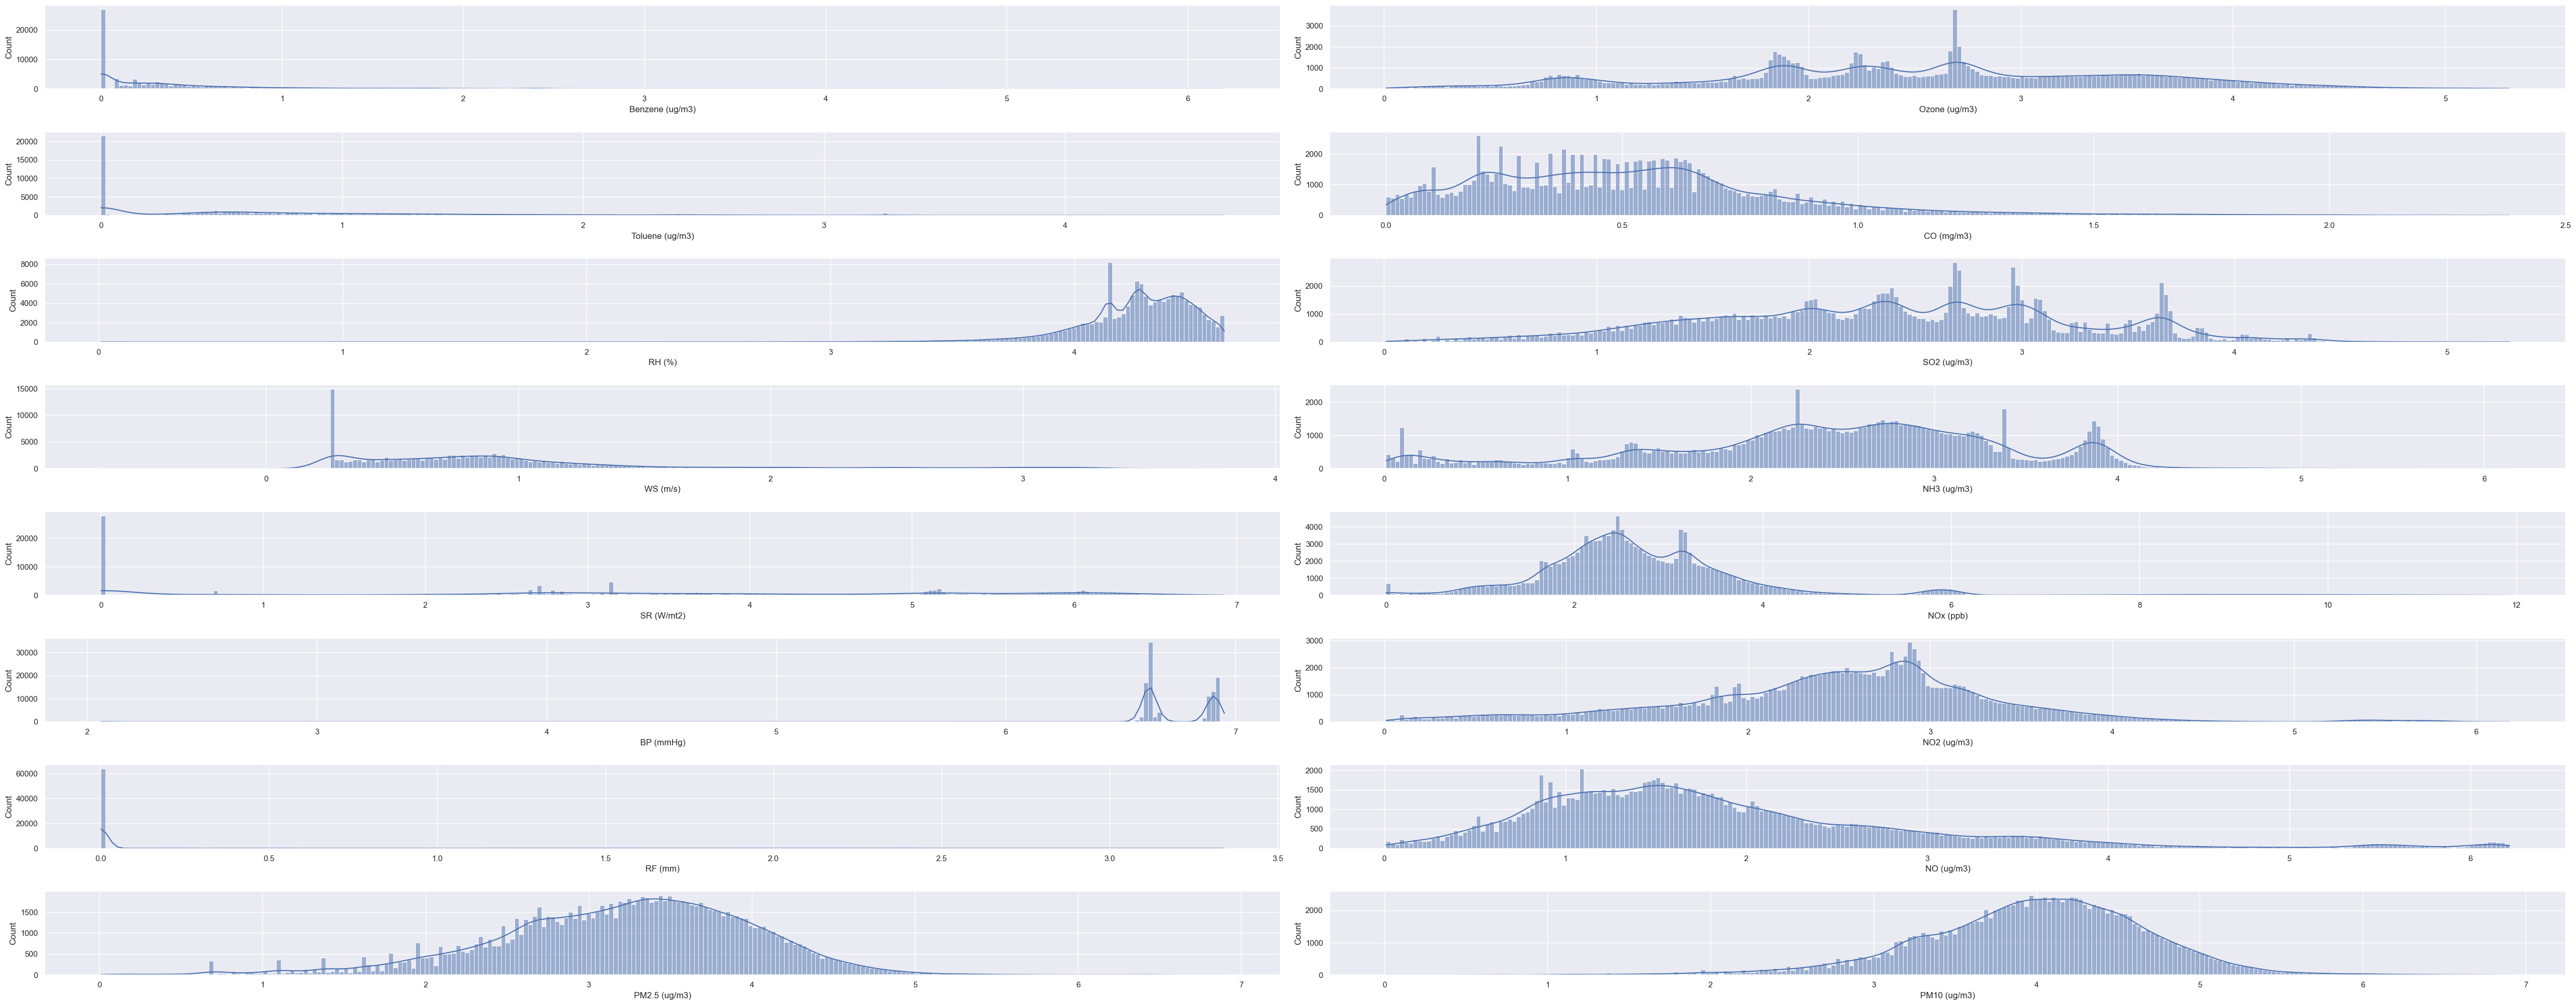

In [14]:
dv = data.copy()
column = ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)','RF (mm)','PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)']
len_column = len(column) if len(column)%2 == 0 else len(column)+1
dv[column] = np.log1p(dv[column])

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(column)//2):
    sns.histplot(data=dv[column[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=dv[column[len(column)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [17]:
ds = outlier_detection(dv,remove=True)
ds.set_index(ds['datetime'],drop=True,inplace=True)
ds.drop("datetime",inplace=True,axis=1)

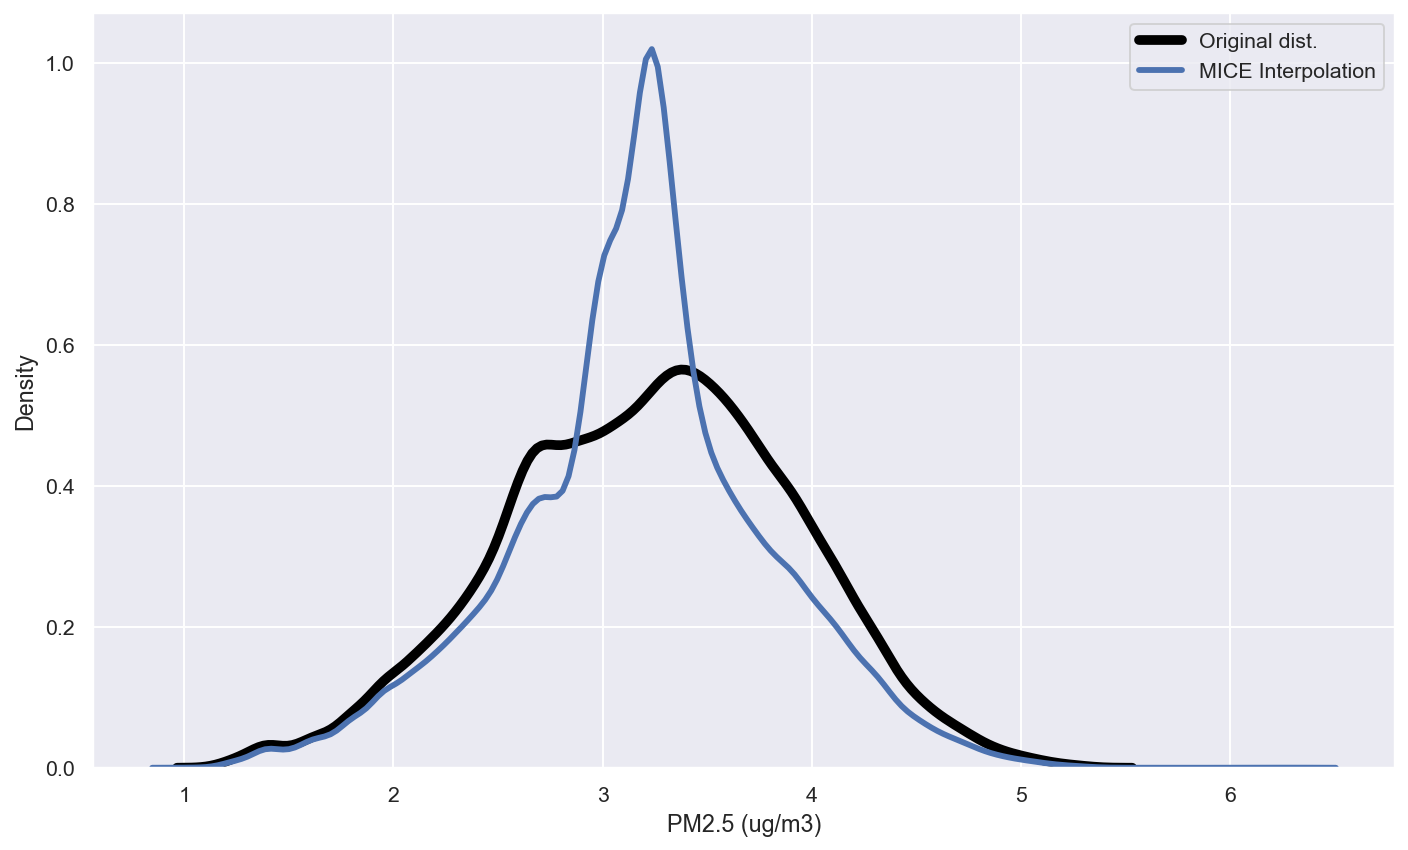

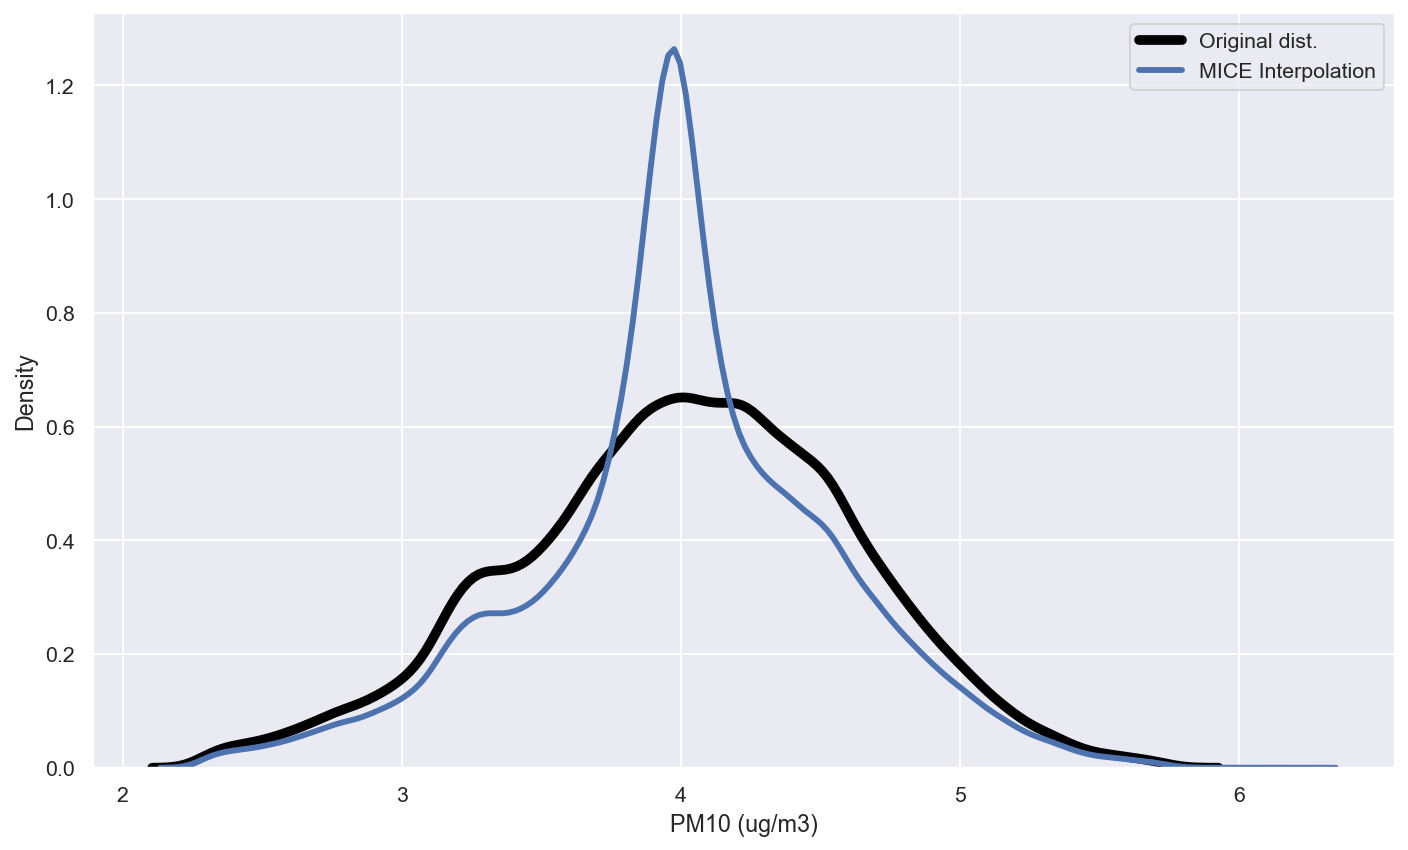

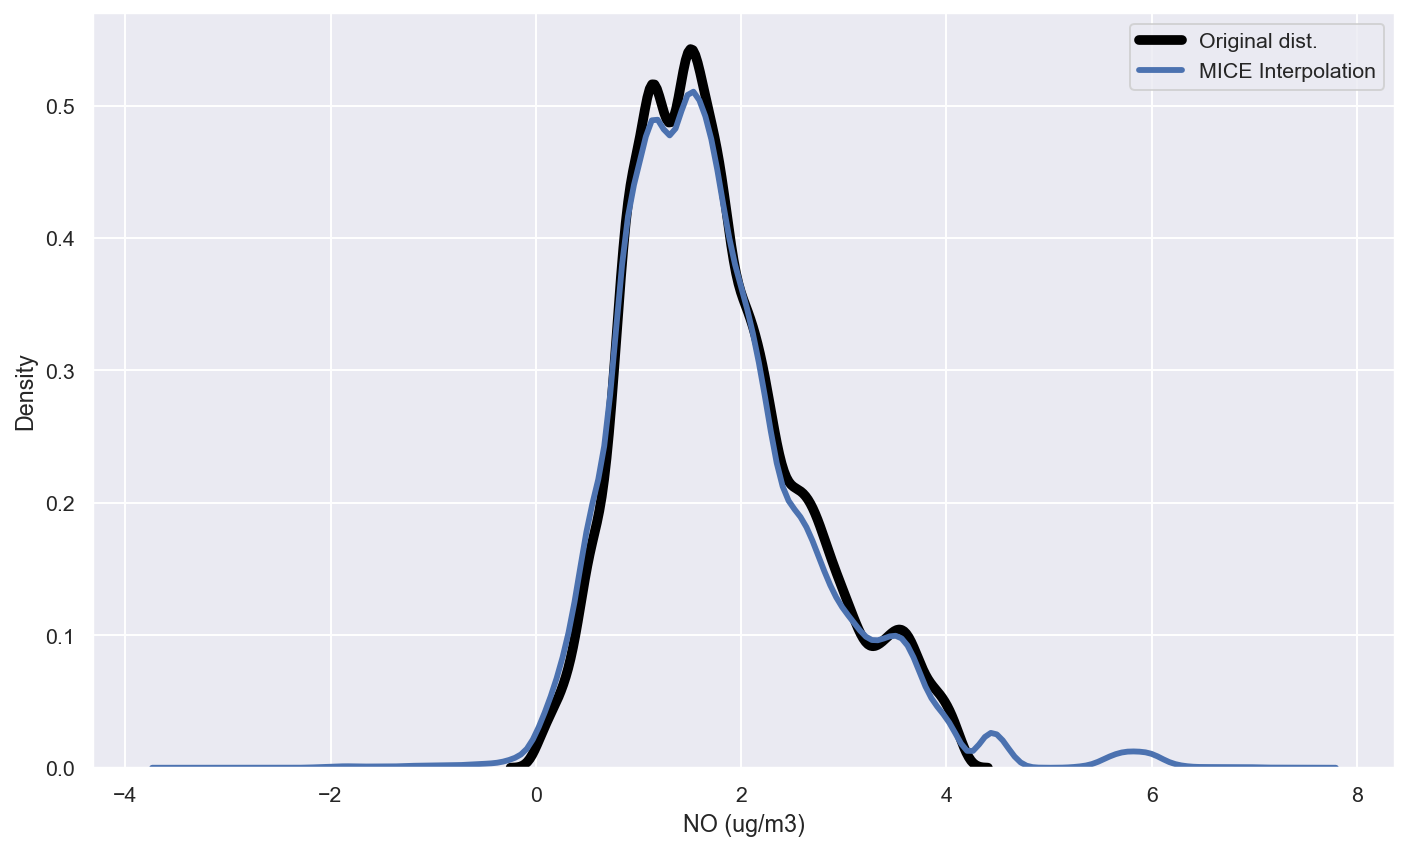

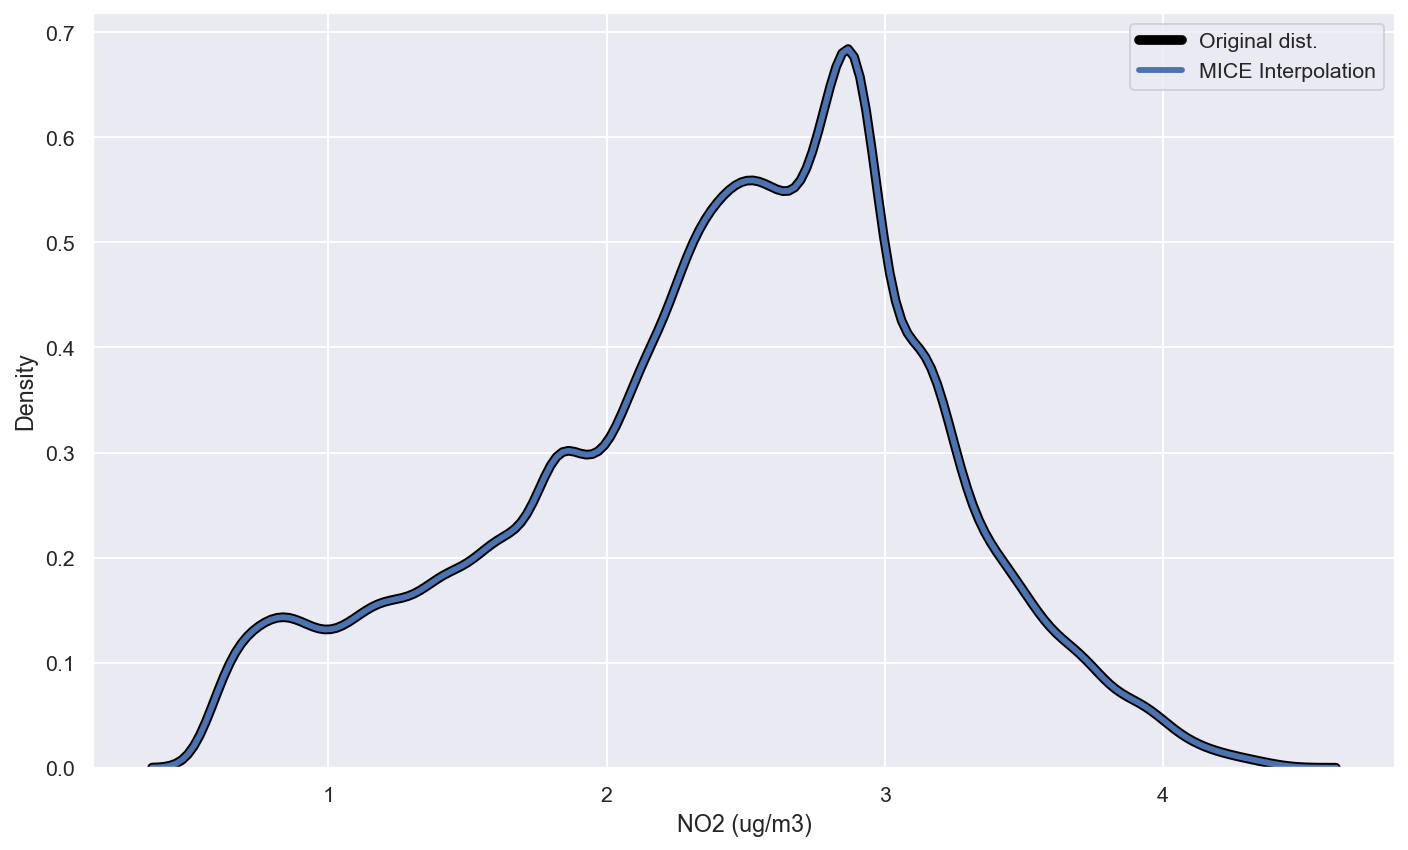

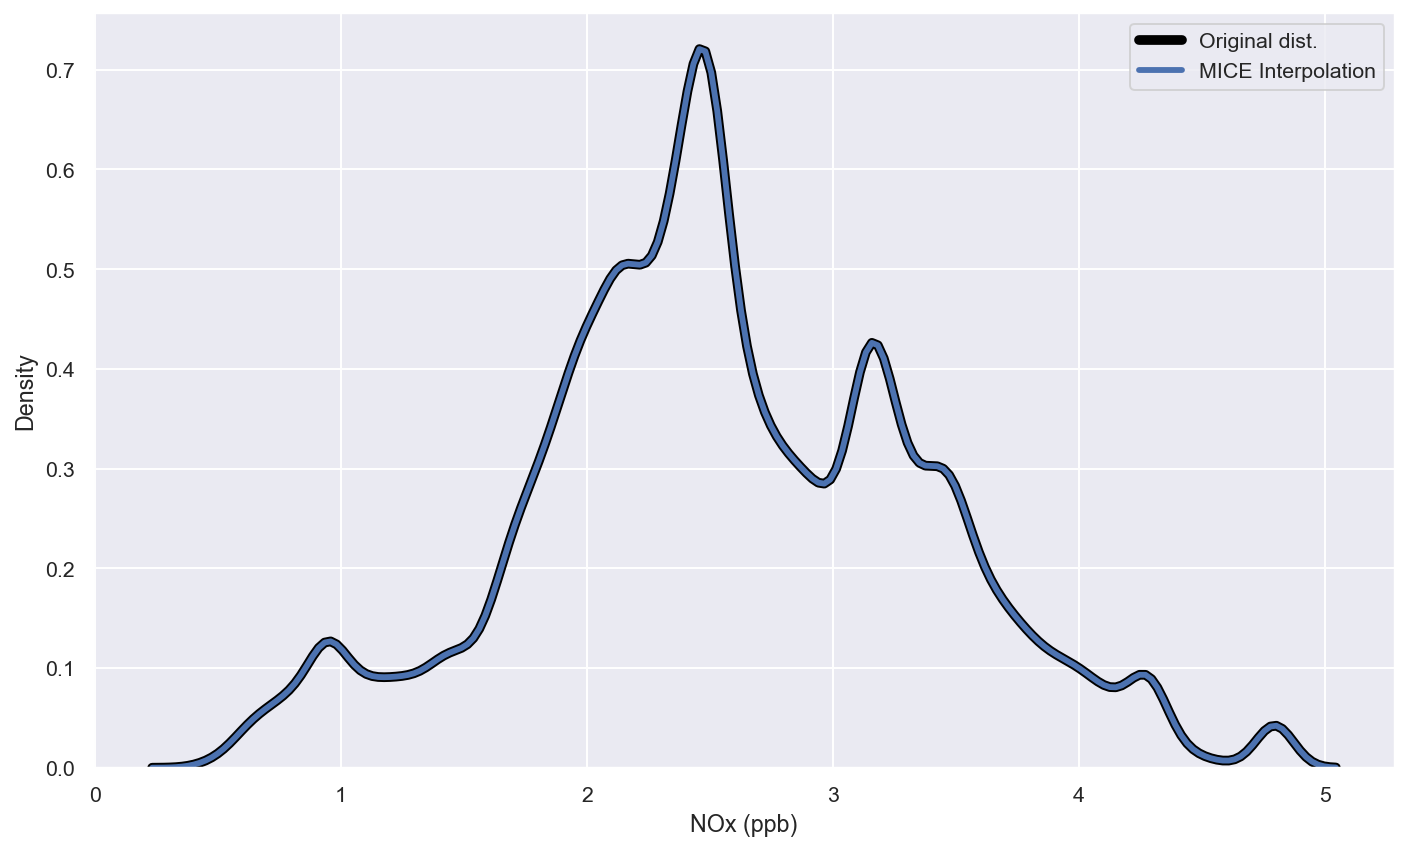

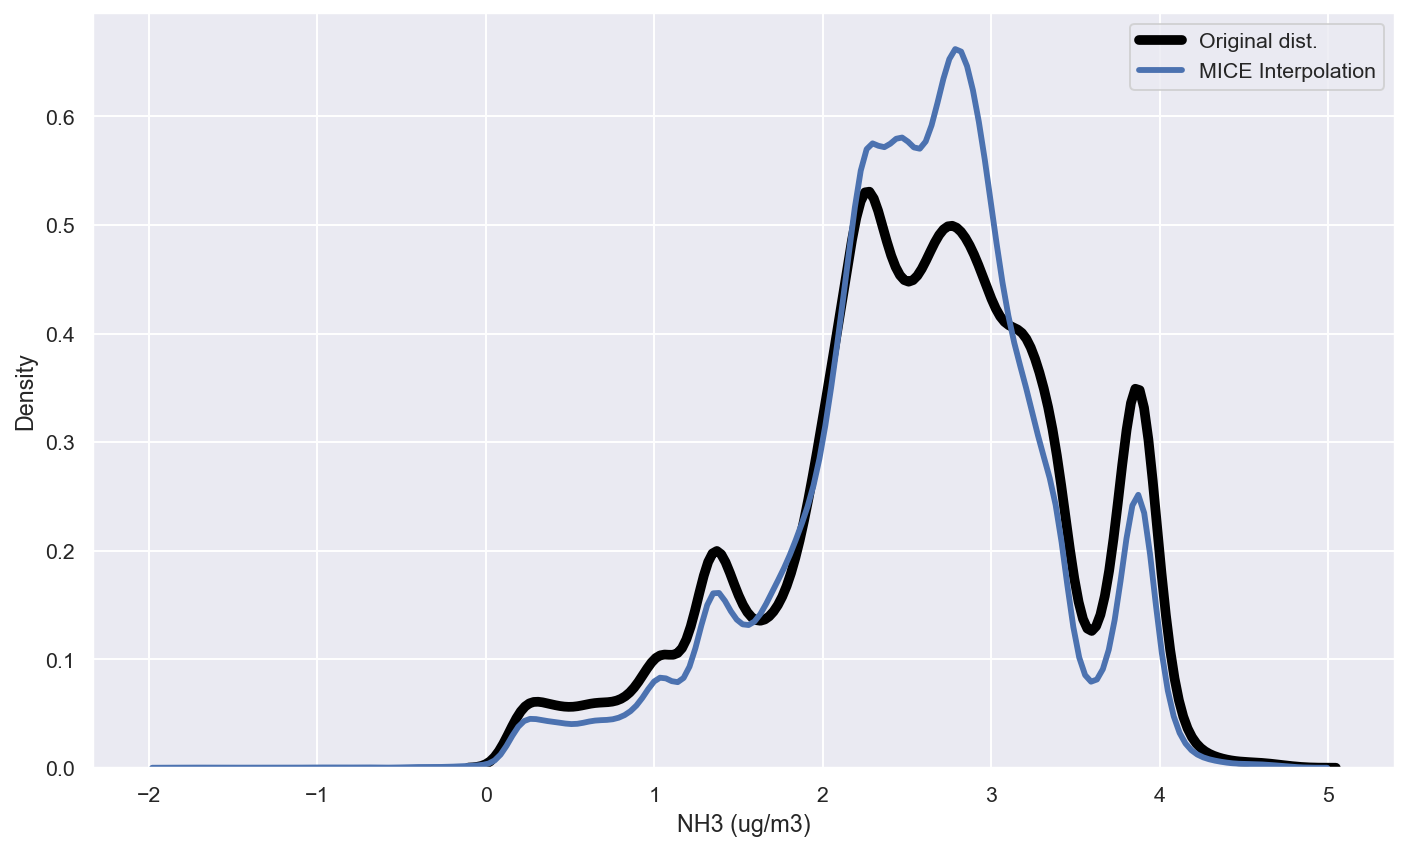

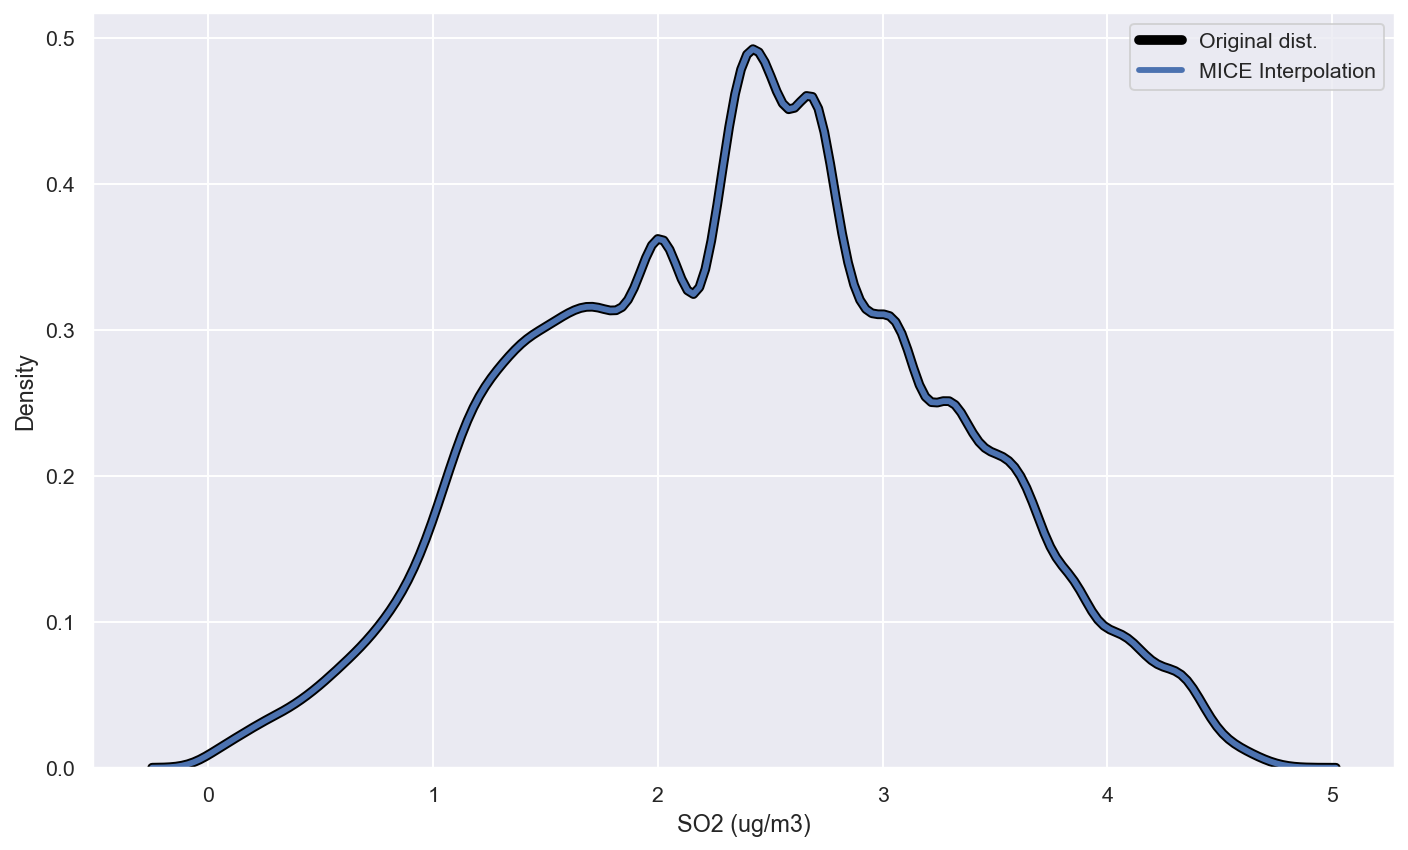

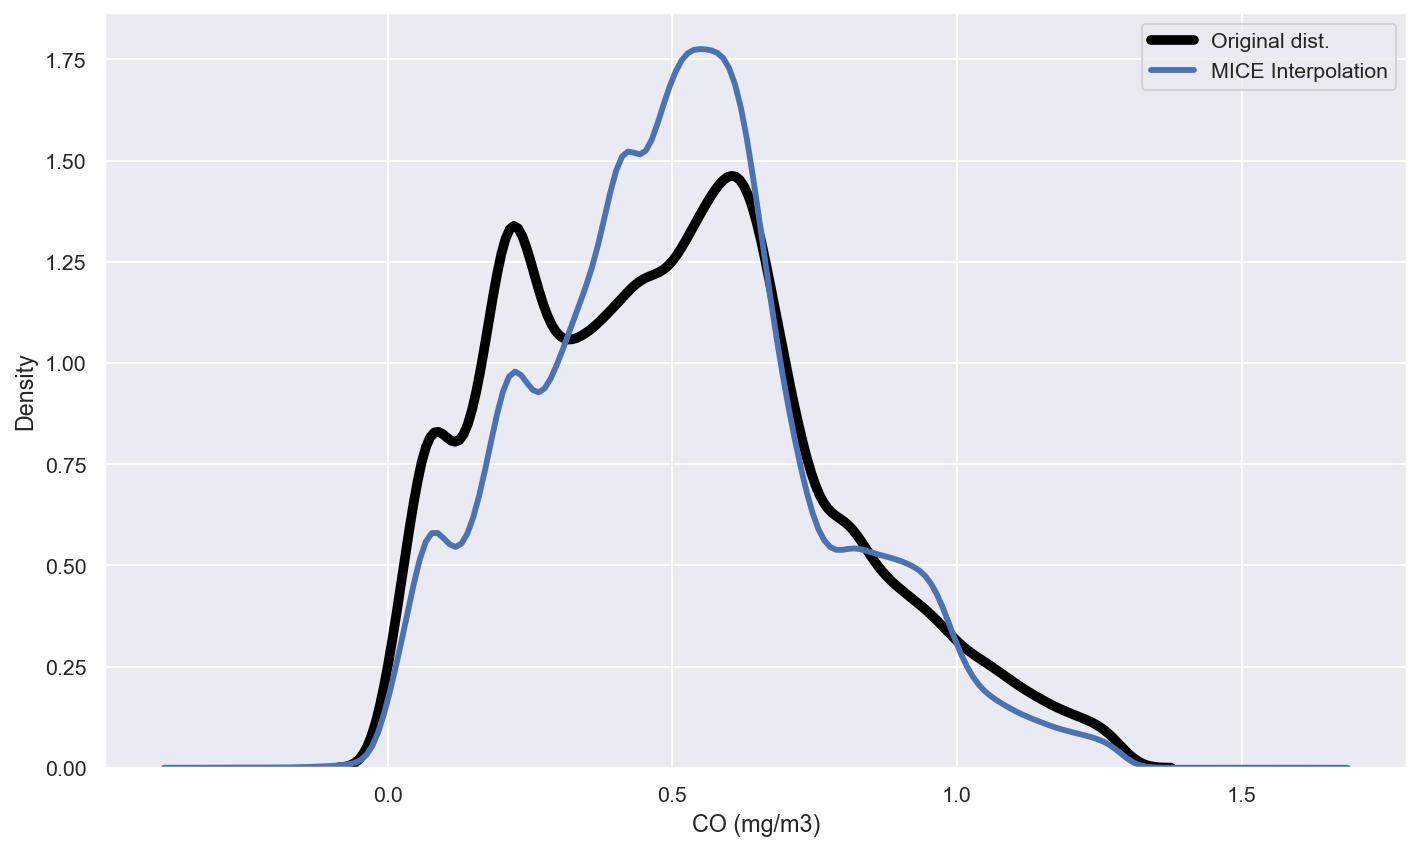

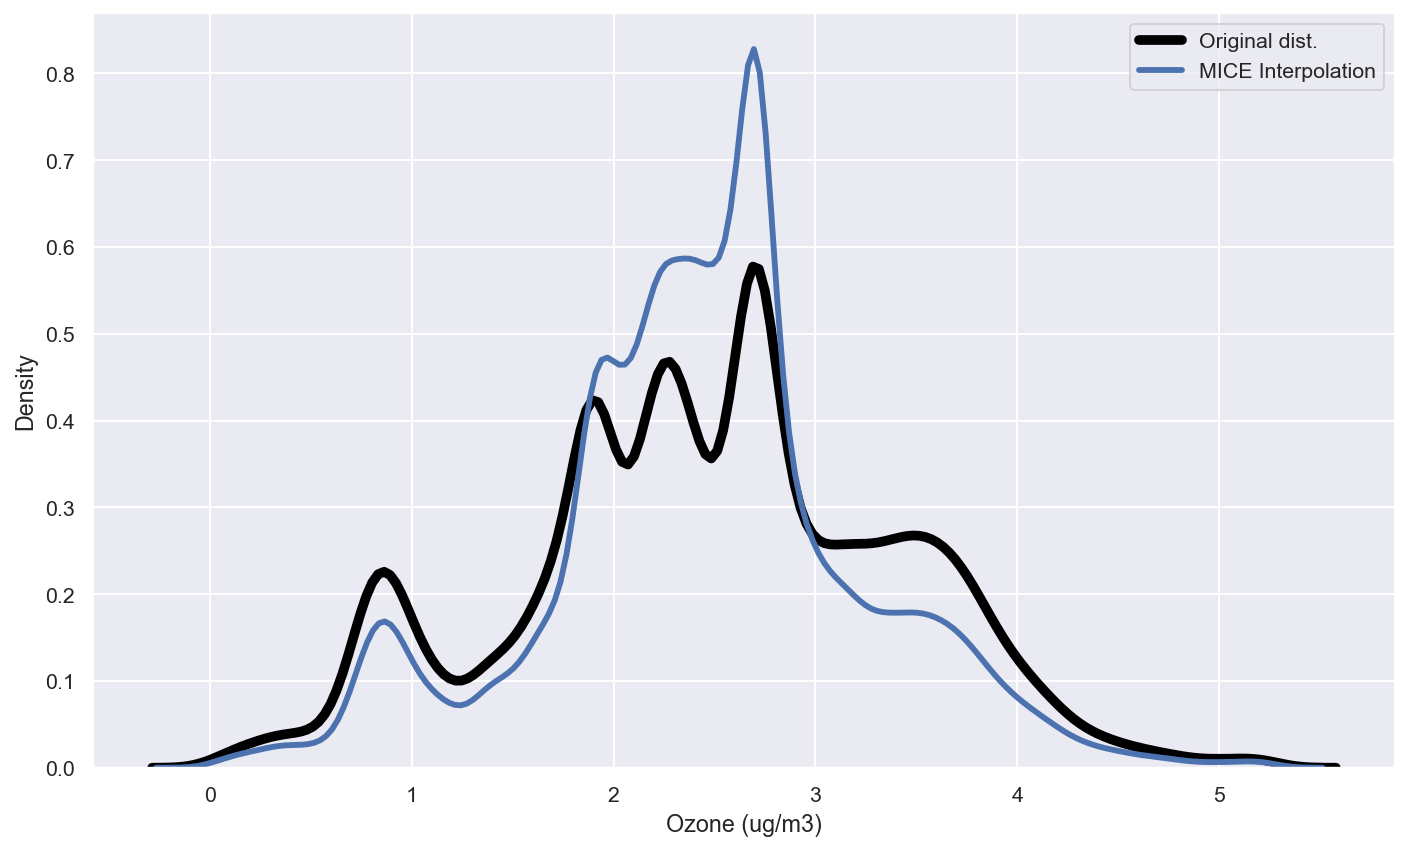

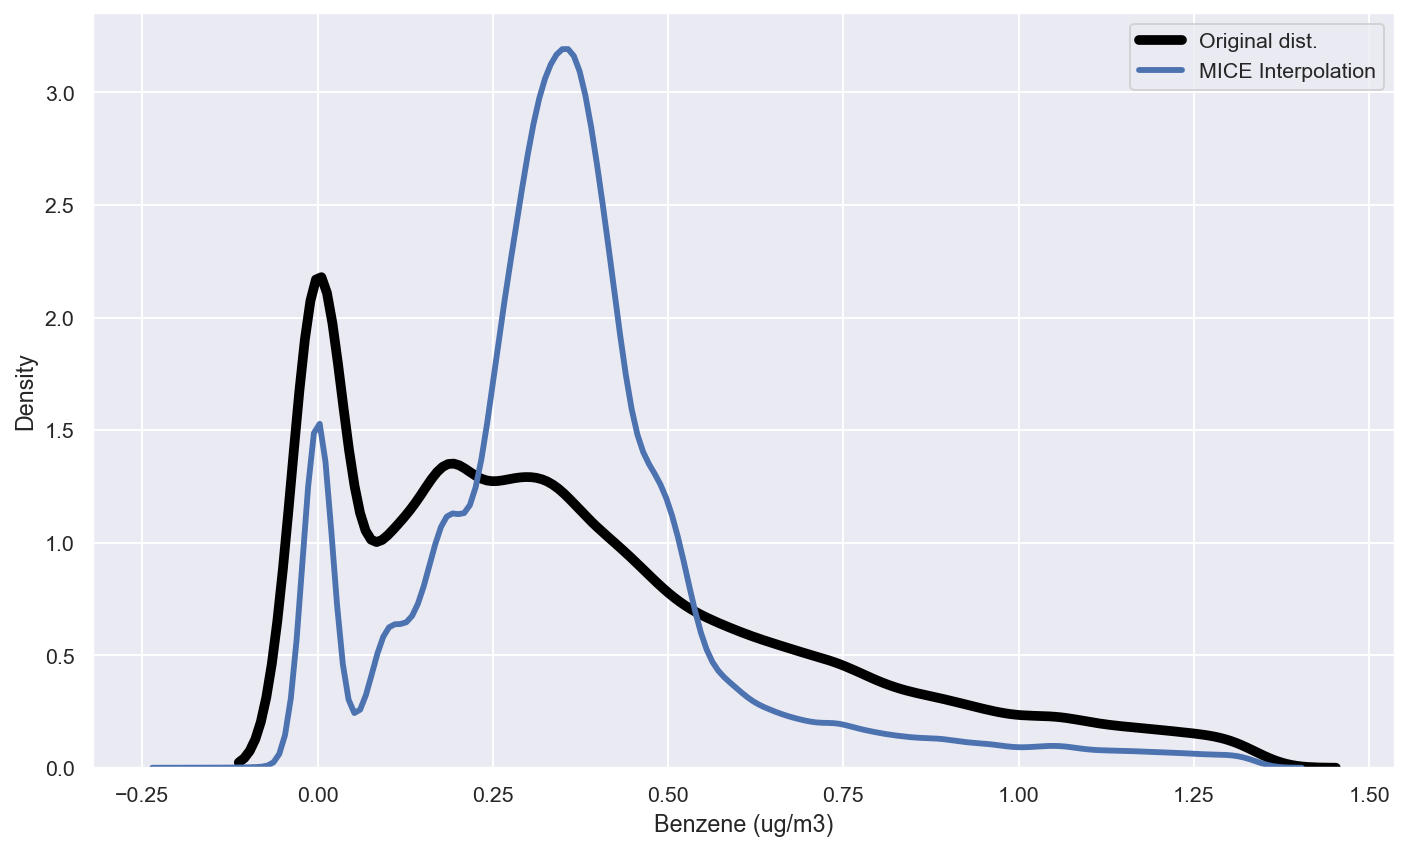

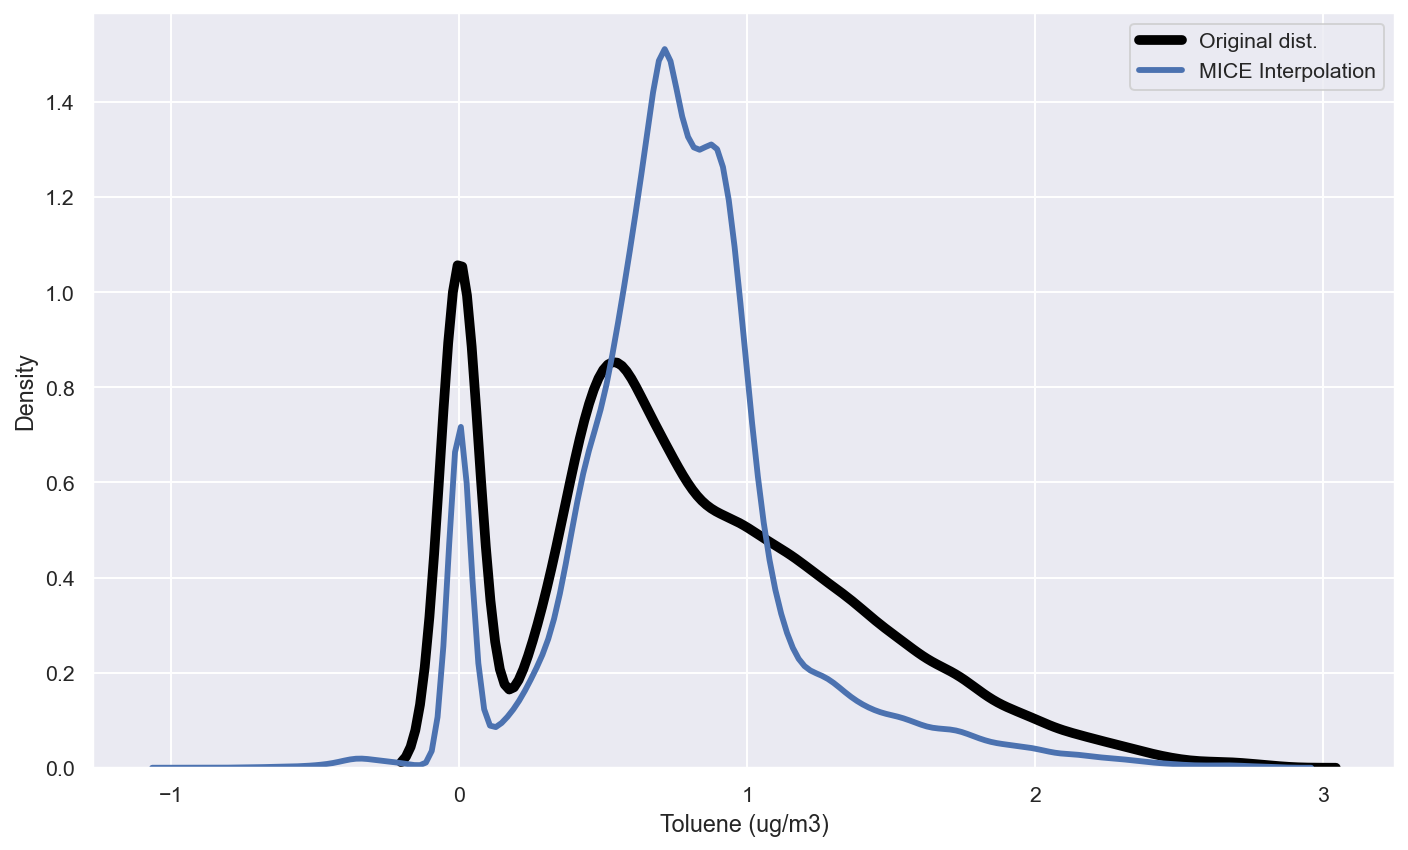

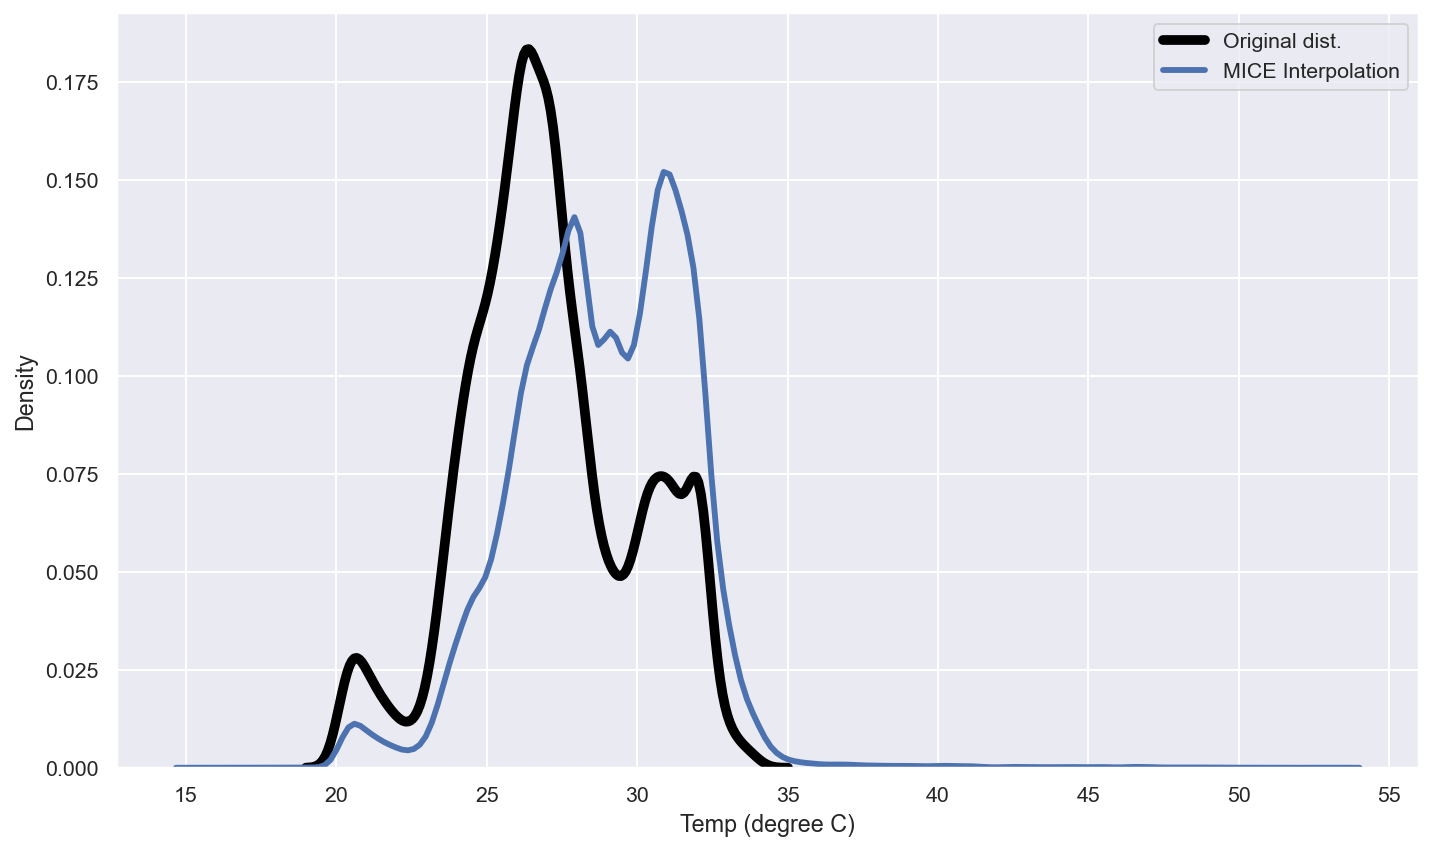

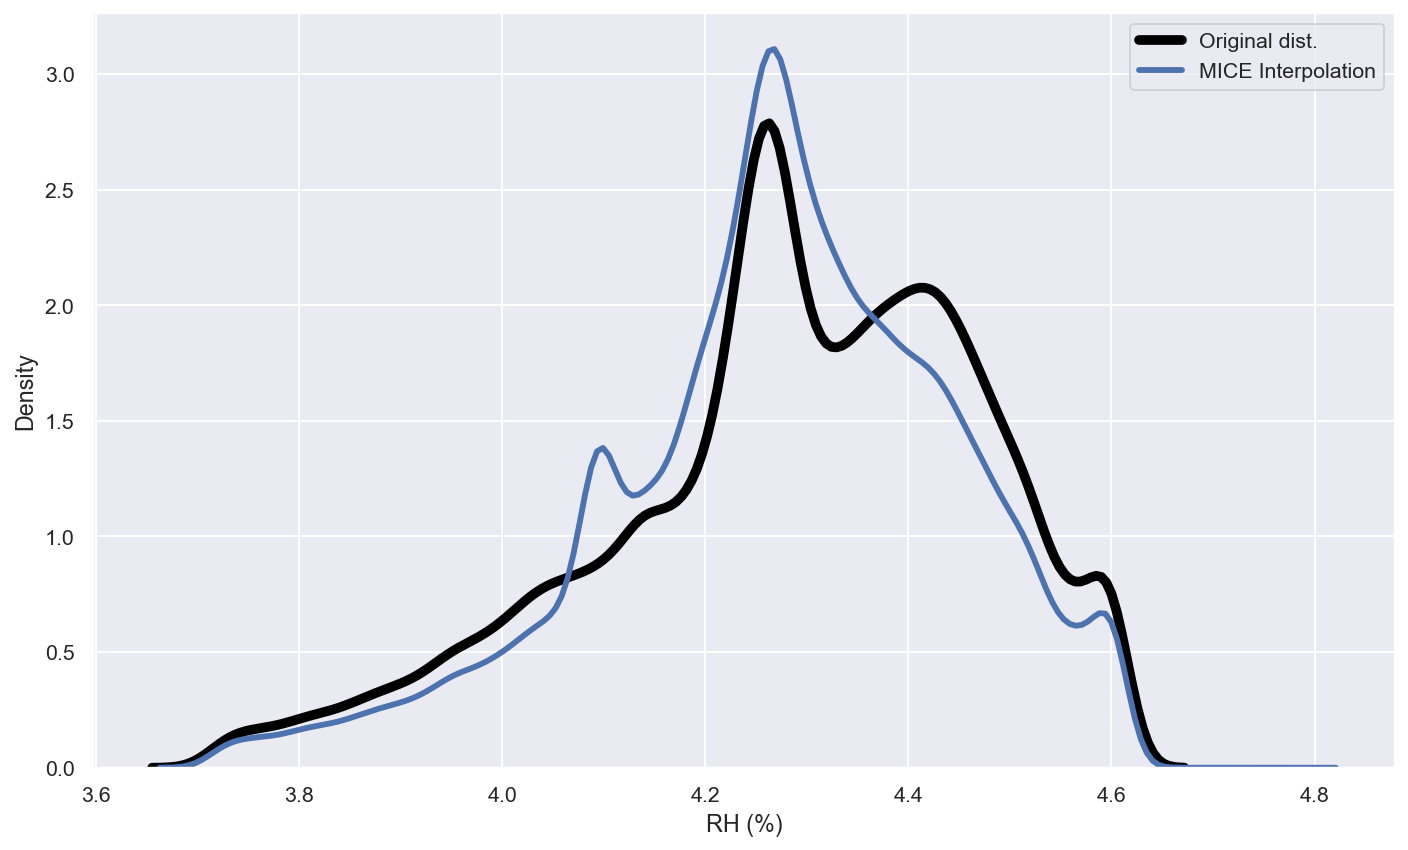

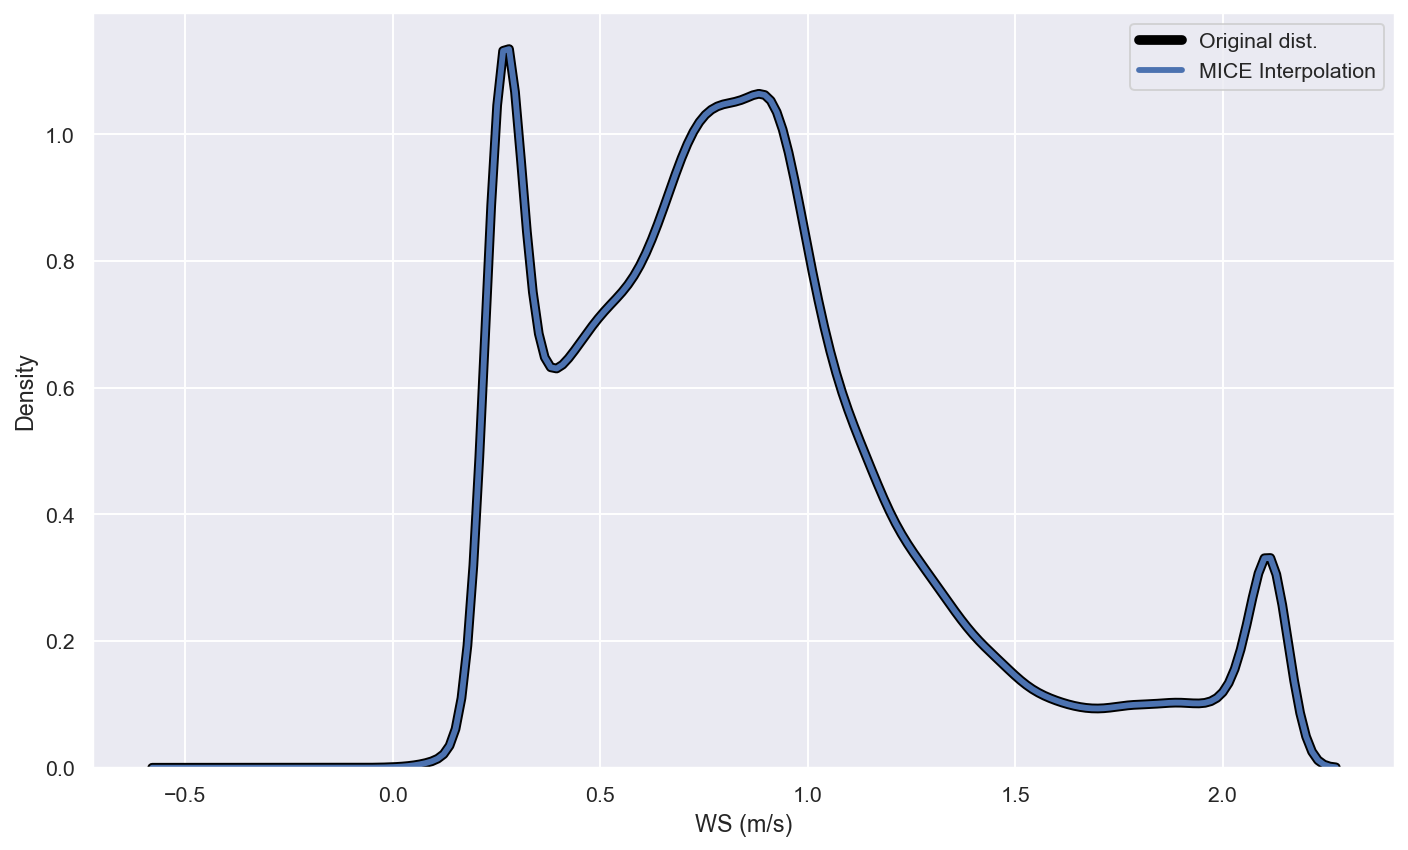

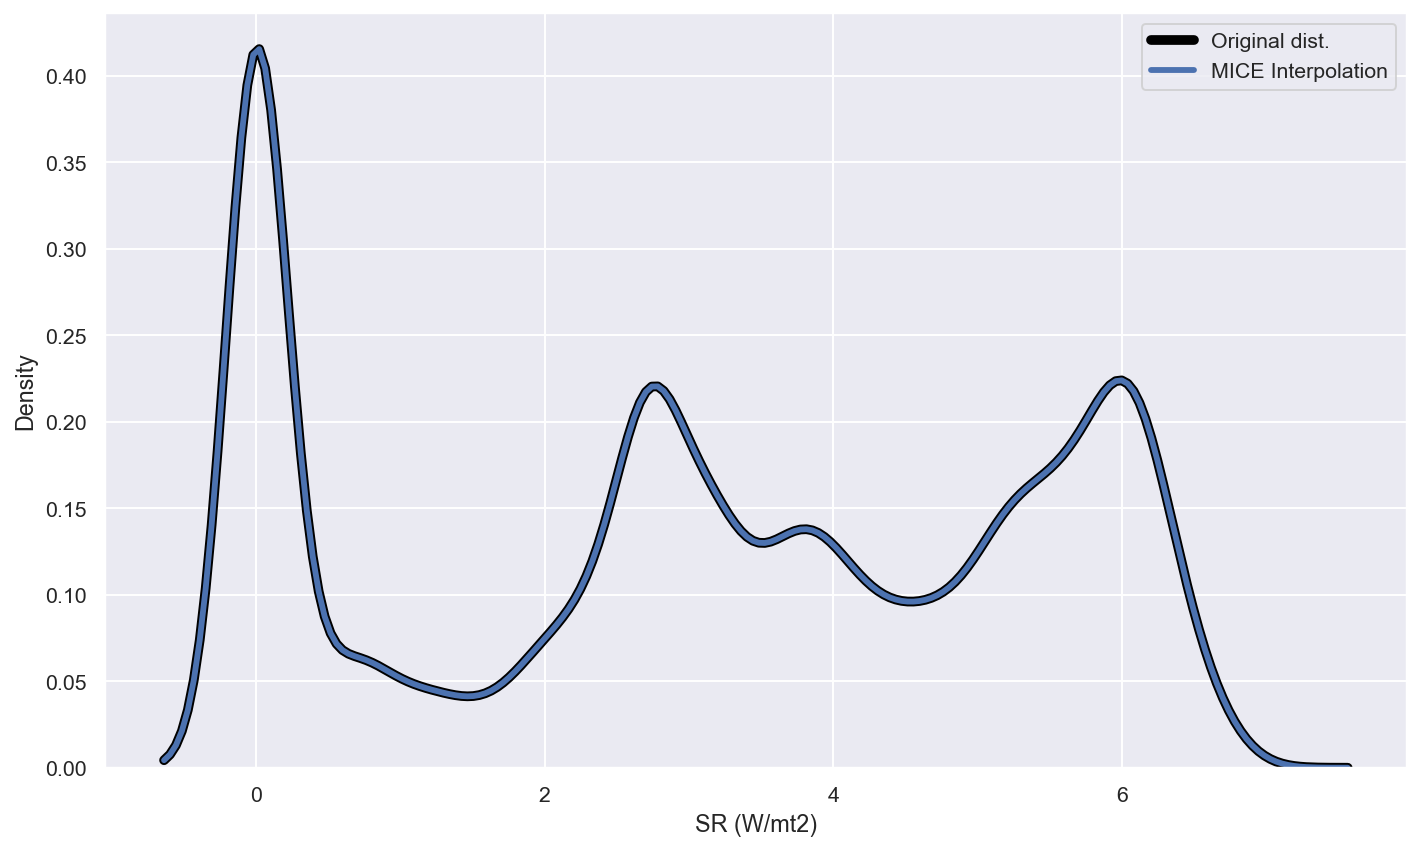

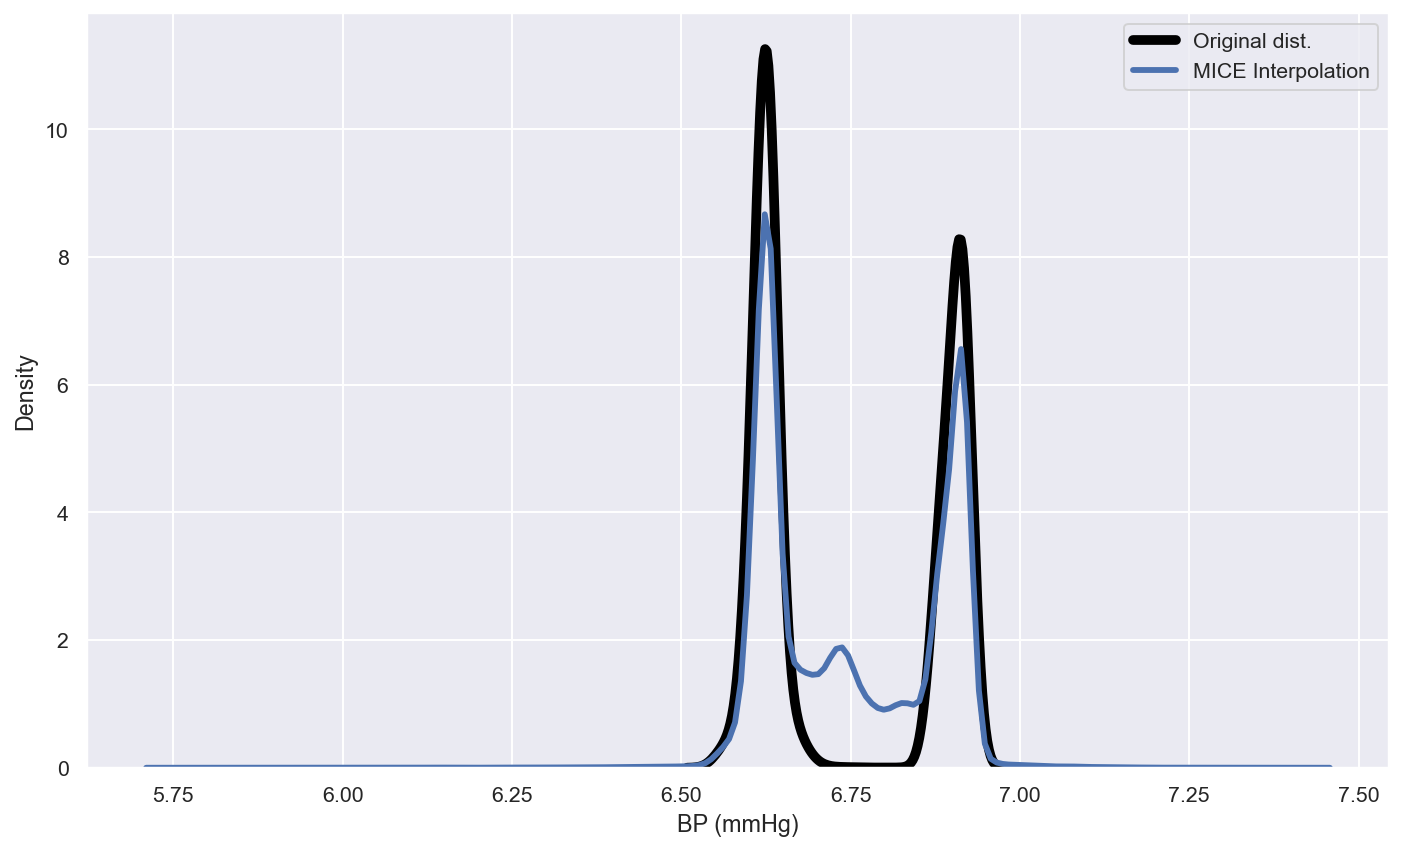

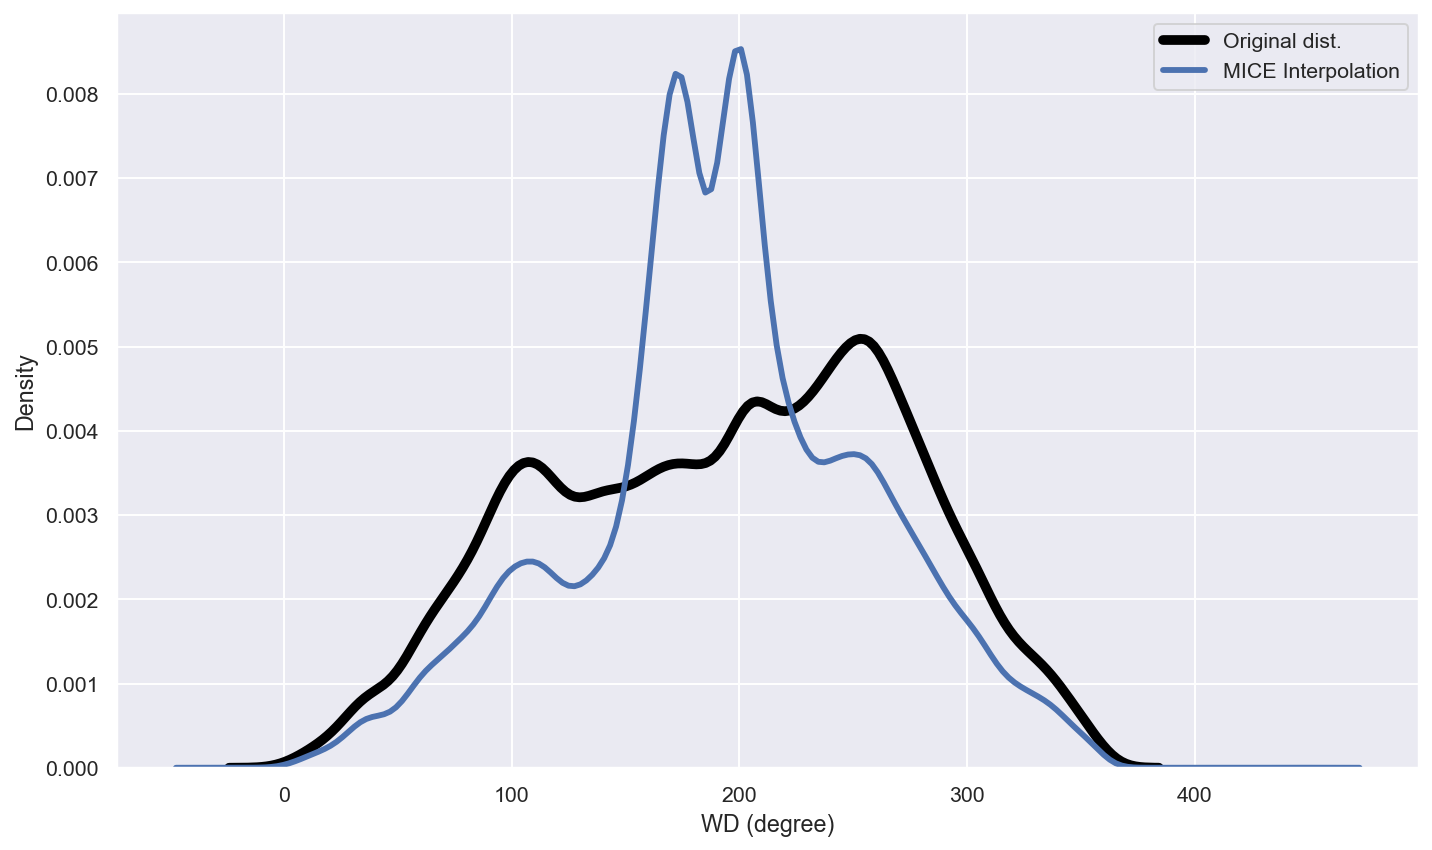

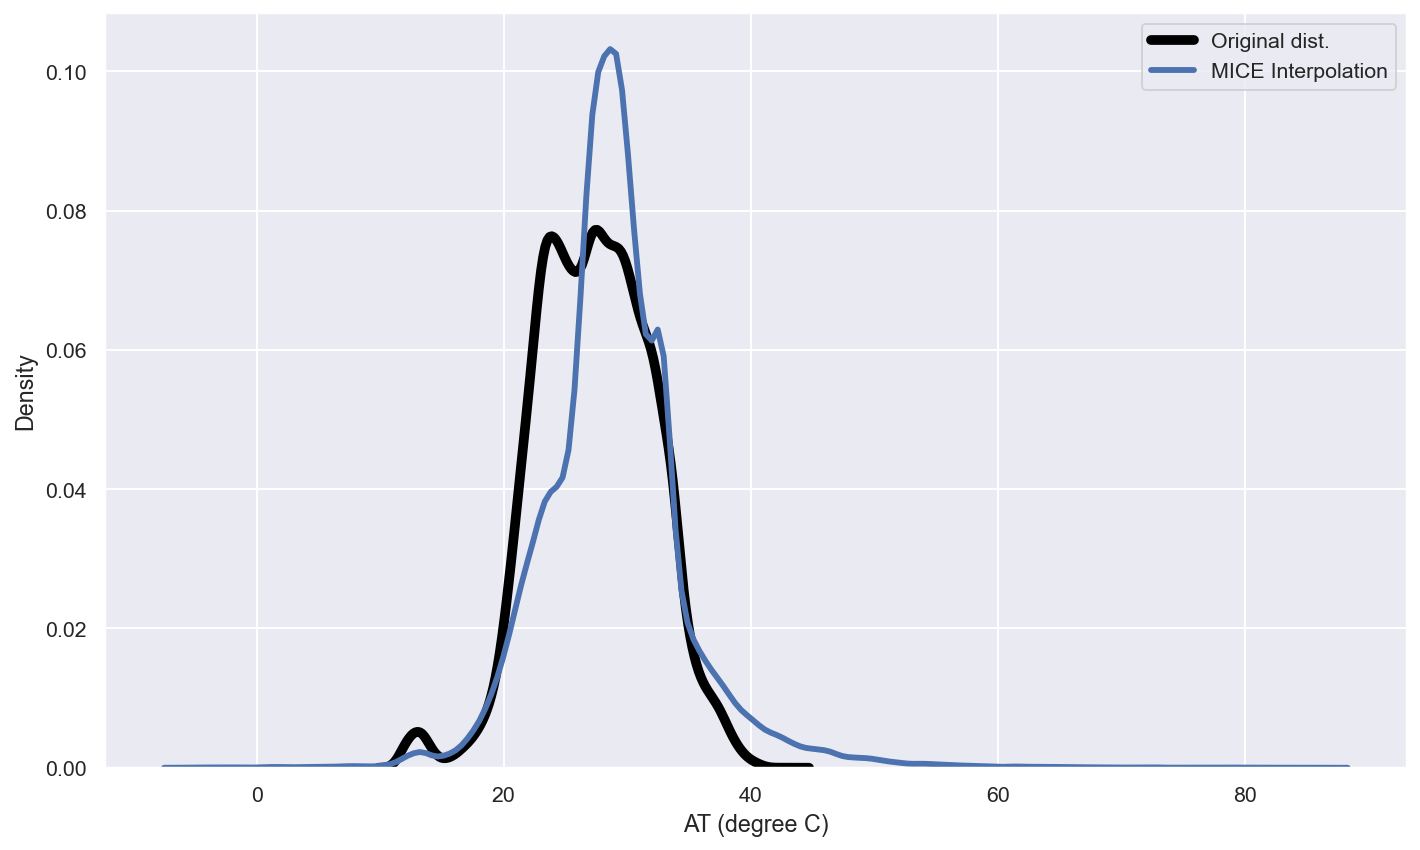

C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_21960\1073257549.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\Abdul Basith R\AppData\Local\Temp\ipykernel_21960\1073257549.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(value, linewidth=3, label=key, ax=ax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


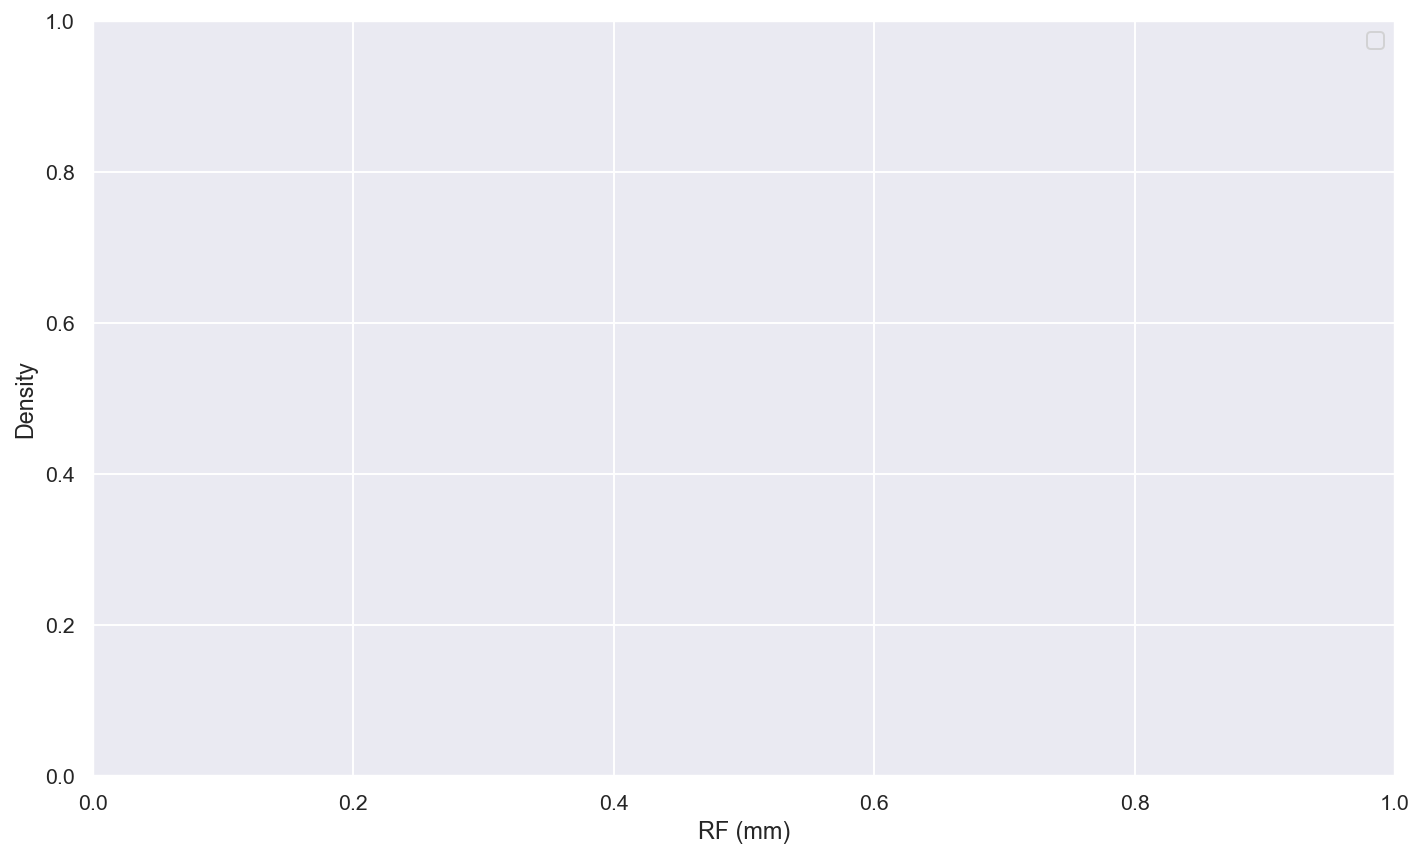

In [18]:
interpolateble_values = []
for k, v in null_value_percentage(df[df.index.year > 2021]).items():
    if v <0.2:
        interpolateble_values.append(k)
interpolateble_values.remove('city')
interpolateble_values.remove('NOx (ppb)')
for i in range(len(interpolateble_values)):
    ds[interpolateble_values[i]].interpolate(method='linear',inplace=True)
ds['NOx (ppb)'].interpolate(method='pad',inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = ds.copy(deep=True)
columns = train_mice.columns
mice_imputer = IterativeImputer(random_state = 42, max_iter=10)
train_mice = mice_imputer.fit_transform(train_mice)
train_mice = pd.DataFrame(train_mice,columns=columns)

for i in columns:
    compare_dists(ds[i], {"MICE Interpolation":train_mice[i] })

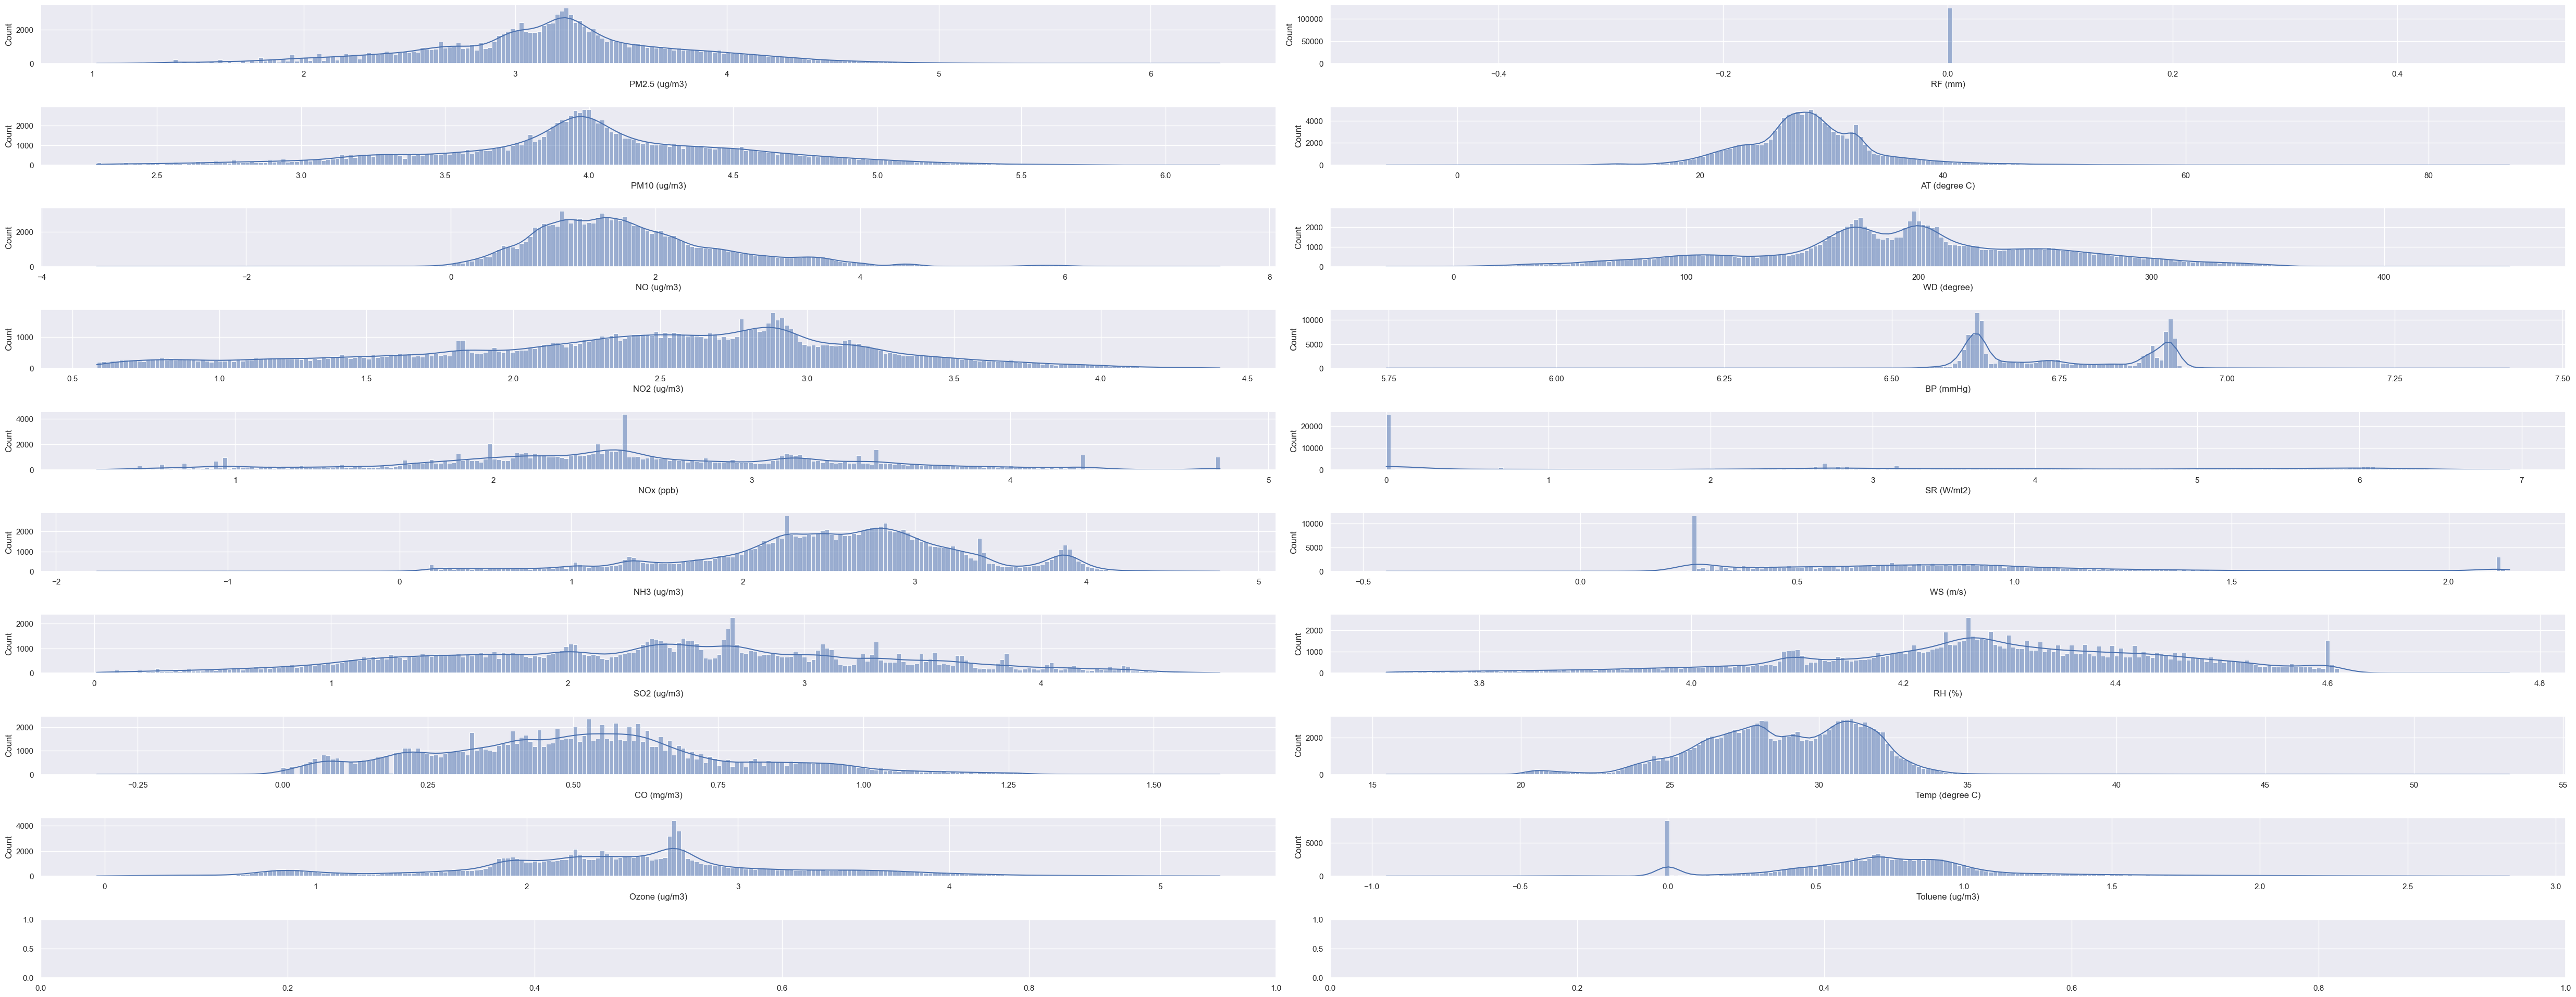

In [19]:
len_column = len(train_mice.columns) if len(train_mice.columns)%2 == 0 else len(train_mice.columns)+1

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(train_mice.columns)//2):
    sns.histplot(data=train_mice[train_mice.columns[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=train_mice[train_mice.columns[len(train_mice.columns)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [20]:
def create_features(df1):
    df1 = df1.copy()
    df1['hour']       = df1.index.hour
    df1['dayofmonth'] = df1.index.day
    df1['dayofweek']  = df1.index.dayofweek
    df1['dayofyear']  = df1.index.dayofyear
    df1['weekofyear'] = df1.index.isocalendar().week.astype("int64")
    df1['month']      = df1.index.month
    df1['quarter']    = df1.index.quarter
    df1['year']       = df1.index.year
    return df1

In [22]:
create_features(train_mice)

AttributeError: 'RangeIndex' object has no attribute 'hour'

In [23]:
train_mice

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),WD (degree),AT (degree C),RF (mm)
0,3.586016,4.248352,1.803359,3.940222,4.034064,4.632591,2.543568,0.936093,2.009555,0.000000,0.000000,26.896862,4.510200,1.196948,2.710048,6.636668,100.490000,20.432841,0.0
1,3.437208,4.132122,1.593309,3.878466,3.956231,4.420165,2.520396,0.875469,2.010895,0.000000,0.000000,26.722473,4.526452,1.153732,2.743417,6.635986,91.620000,20.357533,0.0
2,3.478776,4.164182,1.490654,3.790081,3.864931,4.534318,2.494717,0.850151,1.994700,0.000000,0.000000,26.640536,4.501142,1.187843,2.727853,6.635238,103.660000,20.787502,0.0
3,3.404193,4.106932,1.442202,3.726657,3.801538,4.605870,3.757239,0.609766,2.186051,0.000000,0.000000,25.147266,4.474720,1.337629,2.809403,6.634896,100.030000,24.978059,0.0
4,3.244154,3.987316,1.439835,3.689629,3.766997,4.570165,3.449352,0.609766,2.618125,0.000000,0.000000,25.086902,4.466368,1.294727,2.861057,6.635041,100.570000,24.858588,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124806,3.239679,4.320821,-1.848107,4.249352,0.951658,2.542874,2.467252,0.632715,2.265468,0.447711,1.252521,30.202829,4.245087,1.088562,6.097063,6.642774,165.810564,31.942627,0.0
124807,3.239679,4.320821,-1.848107,4.249352,0.951658,2.542874,2.467252,0.632715,2.265468,0.447711,1.252521,30.202829,4.245087,1.088562,6.097063,6.642774,165.810564,31.942627,0.0
124808,3.239679,4.320821,-1.848107,4.249352,0.951658,2.542874,2.467252,0.632715,2.265468,0.447711,1.252521,30.202829,4.245087,1.088562,6.097063,6.642774,165.810564,31.942627,0.0
124809,3.239679,4.320821,-1.848107,4.249352,0.951658,2.542874,2.467252,0.632715,2.265468,0.447711,1.252521,30.202829,4.245087,1.088562,6.097063,6.642774,165.810564,31.942627,0.0
